# Transformers

In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/509059'

In [2]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.plots import plot_metrics
from transformer.pytorch.utils.load_dataloader import load_dataloader

2024-09-29 13:06:08.900874: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 13:06:08.913488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 13:06:08.928787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 13:06:08.933467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 13:06:08.945283: I tensorflow/core/platform/cpu_feature_guar

2024-09-29 13:06:11.352392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [3]:
from config import dev

dev

device(type='cuda')

In [4]:
import random
import numpy as np
import torch
import tensorflow as tf

In [5]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [6]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader(
    "amazon", sample_size=100_000
)


Loading train tensors:   0%|          | 0/196 [00:00<?, ?it/s]


Loading train tensors:   1%|          | 1/196 [00:00<01:25,  2.29it/s]


Loading train tensors:   1%|          | 2/196 [00:00<01:13,  2.64it/s]


Loading train tensors:   2%|▏         | 3/196 [00:01<01:16,  2.53it/s]


Loading train tensors:   2%|▏         | 4/196 [00:01<01:15,  2.53it/s]


Loading train tensors:   3%|▎         | 5/196 [00:01<01:15,  2.53it/s]


Loading train tensors:   3%|▎         | 6/196 [00:02<01:11,  2.65it/s]


Loading train tensors:   4%|▎         | 7/196 [00:02<01:13,  2.57it/s]


Loading train tensors:   4%|▍         | 8/196 [00:03<01:10,  2.66it/s]


Loading train tensors:   5%|▍         | 9/196 [00:03<01:12,  2.59it/s]


Loading train tensors:   5%|▌         | 10/196 [00:03<01:12,  2.57it/s]


Loading train tensors:   6%|▌         | 11/196 [00:04<01:13,  2.53it/s]


Loading train tensors:   6%|▌         | 12/196 [00:04<01:12,  2.53it/s]


Loading train tensors:   7%|▋         | 13/196 [00:05<01:09,  2.62it/s]


Loading train tensors:   7%|▋         | 14/196 [00:05<01:10,  2.59it/s]


Loading train tensors:   8%|▊         | 15/196 [00:05<01:11,  2.52it/s]


Loading train tensors:   8%|▊         | 16/196 [00:06<01:12,  2.49it/s]


Loading train tensors:   9%|▊         | 17/196 [00:06<01:12,  2.47it/s]


Loading train tensors:   9%|▉         | 18/196 [00:07<01:13,  2.43it/s]


Loading train tensors:  10%|▉         | 19/196 [00:07<01:11,  2.46it/s]


Loading train tensors:  10%|█         | 20/196 [00:07<01:08,  2.56it/s]


Loading train tensors:  11%|█         | 21/196 [00:08<01:08,  2.55it/s]


Loading train tensors:  11%|█         | 22/196 [00:08<01:15,  2.31it/s]


Loading train tensors:  12%|█▏        | 23/196 [00:09<01:24,  2.04it/s]


Loading train tensors:  12%|█▏        | 24/196 [00:09<01:28,  1.95it/s]


Loading train tensors:  13%|█▎        | 25/196 [00:10<01:35,  1.79it/s]


Loading train tensors:  13%|█▎        | 26/196 [00:11<01:38,  1.72it/s]


Loading train tensors:  14%|█▍        | 27/196 [00:11<01:40,  1.67it/s]


Loading train tensors:  14%|█▍        | 28/196 [00:12<01:42,  1.64it/s]


Loading train tensors:  15%|█▍        | 29/196 [00:13<01:43,  1.61it/s]


Loading train tensors:  15%|█▌        | 30/196 [00:13<01:42,  1.62it/s]


Loading train tensors:  16%|█▌        | 31/196 [00:14<01:43,  1.60it/s]


Loading train tensors:  16%|█▋        | 32/196 [00:15<01:42,  1.61it/s]


Loading train tensors:  17%|█▋        | 33/196 [00:15<01:40,  1.61it/s]


Loading train tensors:  17%|█▋        | 34/196 [00:16<01:40,  1.62it/s]


Loading train tensors:  18%|█▊        | 35/196 [00:16<01:41,  1.59it/s]


Loading train tensors:  18%|█▊        | 36/196 [00:17<01:40,  1.59it/s]


Loading train tensors:  19%|█▉        | 37/196 [00:18<01:39,  1.59it/s]


Loading train tensors:  19%|█▉        | 38/196 [00:18<01:39,  1.59it/s]


Loading train tensors:  20%|█▉        | 39/196 [00:19<01:38,  1.60it/s]


Loading train tensors:  20%|██        | 40/196 [00:20<01:38,  1.58it/s]


Loading train tensors:  21%|██        | 41/196 [00:20<01:37,  1.60it/s]


Loading train tensors:  21%|██▏       | 42/196 [00:21<01:37,  1.57it/s]


Loading train tensors:  22%|██▏       | 43/196 [00:21<01:36,  1.58it/s]


Loading train tensors:  22%|██▏       | 44/196 [00:22<01:35,  1.59it/s]


Loading train tensors:  23%|██▎       | 45/196 [00:23<01:34,  1.59it/s]


Loading train tensors:  23%|██▎       | 46/196 [00:23<01:33,  1.60it/s]


Loading train tensors:  24%|██▍       | 47/196 [00:24<01:34,  1.57it/s]


Loading train tensors:  24%|██▍       | 48/196 [00:25<01:33,  1.59it/s]


Loading train tensors:  25%|██▌       | 49/196 [00:25<01:32,  1.59it/s]


Loading train tensors:  26%|██▌       | 50/196 [00:26<01:31,  1.60it/s]


Loading train tensors:  26%|██▌       | 51/196 [00:27<01:30,  1.60it/s]


Loading train tensors:  27%|██▋       | 52/196 [00:27<01:29,  1.60it/s]


Loading train tensors:  27%|██▋       | 53/196 [00:28<01:28,  1.61it/s]


Loading train tensors:  28%|██▊       | 54/196 [00:28<01:28,  1.61it/s]


Loading train tensors:  28%|██▊       | 55/196 [00:29<01:27,  1.61it/s]


Loading train tensors:  29%|██▊       | 56/196 [00:30<01:27,  1.61it/s]


Loading train tensors:  29%|██▉       | 57/196 [00:30<01:28,  1.58it/s]


Loading train tensors:  30%|██▉       | 58/196 [00:31<01:26,  1.59it/s]


Loading train tensors:  30%|███       | 59/196 [00:32<01:25,  1.59it/s]


Loading train tensors:  31%|███       | 60/196 [00:32<01:25,  1.60it/s]


Loading train tensors:  31%|███       | 61/196 [00:33<01:24,  1.60it/s]


Loading train tensors:  32%|███▏      | 62/196 [00:33<01:25,  1.57it/s]


Loading train tensors:  32%|███▏      | 63/196 [00:34<01:23,  1.59it/s]


Loading train tensors:  33%|███▎      | 64/196 [00:35<01:23,  1.58it/s]


Loading train tensors:  33%|███▎      | 65/196 [00:35<01:22,  1.60it/s]


Loading train tensors:  34%|███▎      | 66/196 [00:36<01:20,  1.61it/s]


Loading train tensors:  34%|███▍      | 67/196 [00:37<01:19,  1.62it/s]


Loading train tensors:  35%|███▍      | 68/196 [00:37<01:19,  1.61it/s]


Loading train tensors:  35%|███▌      | 69/196 [00:38<01:25,  1.48it/s]


Loading train tensors:  36%|███▌      | 70/196 [00:41<02:51,  1.36s/it]


Loading train tensors:  36%|███▌      | 71/196 [00:44<03:50,  1.84s/it]


Loading train tensors:  37%|███▋      | 72/196 [00:47<04:28,  2.17s/it]


Loading train tensors:  37%|███▋      | 73/196 [00:47<03:28,  1.69s/it]


Loading train tensors:  38%|███▊      | 74/196 [00:50<04:12,  2.07s/it]


Loading train tensors:  38%|███▊      | 75/196 [00:51<03:16,  1.63s/it]


Loading train tensors:  39%|███▉      | 76/196 [00:54<04:02,  2.02s/it]


Loading train tensors:  39%|███▉      | 77/196 [00:57<04:34,  2.31s/it]


Loading train tensors:  40%|███▉      | 78/196 [01:00<04:54,  2.50s/it]


Loading train tensors:  40%|████      | 79/196 [01:00<03:45,  1.92s/it]


Loading train tensors:  41%|████      | 80/196 [01:03<04:17,  2.22s/it]


Loading train tensors:  41%|████▏     | 81/196 [01:06<04:40,  2.44s/it]


Loading train tensors:  42%|████▏     | 82/196 [01:09<04:54,  2.58s/it]


Loading train tensors:  42%|████▏     | 83/196 [01:12<05:03,  2.68s/it]


Loading train tensors:  43%|████▎     | 84/196 [01:15<05:12,  2.79s/it]


Loading train tensors:  43%|████▎     | 85/196 [01:18<05:21,  2.89s/it]


Loading train tensors:  44%|████▍     | 86/196 [01:21<05:21,  2.92s/it]


Loading train tensors:  44%|████▍     | 87/196 [01:24<05:19,  2.93s/it]


Loading train tensors:  45%|████▍     | 88/196 [01:27<05:19,  2.96s/it]


Loading train tensors:  45%|████▌     | 89/196 [01:28<04:00,  2.25s/it]


Loading train tensors:  46%|████▌     | 90/196 [01:28<03:07,  1.77s/it]


Loading train tensors:  46%|████▋     | 91/196 [01:31<03:22,  1.93s/it]


Loading train tensors:  47%|████▋     | 92/196 [01:34<03:54,  2.26s/it]


Loading train tensors:  47%|████▋     | 93/196 [01:37<04:12,  2.46s/it]


Loading train tensors:  48%|████▊     | 94/196 [01:37<03:12,  1.89s/it]


Loading train tensors:  48%|████▊     | 95/196 [01:41<03:52,  2.30s/it]


Loading train tensors:  49%|████▉     | 96/196 [01:41<02:58,  1.78s/it]


Loading train tensors:  49%|████▉     | 97/196 [01:44<03:34,  2.16s/it]


Loading train tensors:  50%|█████     | 98/196 [01:47<03:56,  2.42s/it]


Loading train tensors:  51%|█████     | 99/196 [01:50<04:08,  2.56s/it]


Loading train tensors:  51%|█████     | 100/196 [01:53<04:10,  2.61s/it]


Loading train tensors:  52%|█████▏    | 101/196 [01:56<04:18,  2.72s/it]


Loading train tensors:  52%|█████▏    | 102/196 [01:59<04:21,  2.78s/it]


Loading train tensors:  53%|█████▎    | 103/196 [02:01<04:20,  2.80s/it]


Loading train tensors:  53%|█████▎    | 104/196 [02:04<04:19,  2.82s/it]


Loading train tensors:  54%|█████▎    | 105/196 [02:07<04:16,  2.82s/it]


Loading train tensors:  54%|█████▍    | 106/196 [02:10<04:16,  2.85s/it]


Loading train tensors:  55%|█████▍    | 107/196 [02:13<04:17,  2.89s/it]


Loading train tensors:  55%|█████▌    | 108/196 [02:14<03:21,  2.29s/it]


Loading train tensors:  56%|█████▌    | 109/196 [02:17<03:35,  2.48s/it]


Loading train tensors:  56%|█████▌    | 110/196 [02:20<03:43,  2.60s/it]


Loading train tensors:  57%|█████▋    | 111/196 [02:23<03:46,  2.66s/it]


Loading train tensors:  57%|█████▋    | 112/196 [02:23<02:48,  2.00s/it]


Loading train tensors:  58%|█████▊    | 113/196 [02:26<03:06,  2.24s/it]


Loading train tensors:  58%|█████▊    | 114/196 [02:26<02:20,  1.71s/it]


Loading train tensors:  59%|█████▊    | 115/196 [02:29<02:46,  2.05s/it]


Loading train tensors:  59%|█████▉    | 116/196 [02:32<03:05,  2.32s/it]


Loading train tensors:  60%|█████▉    | 117/196 [02:35<03:15,  2.47s/it]


Loading train tensors:  60%|██████    | 118/196 [02:38<03:21,  2.58s/it]


Loading train tensors:  61%|██████    | 119/196 [02:41<03:26,  2.68s/it]


Loading train tensors:  61%|██████    | 120/196 [02:44<03:27,  2.73s/it]


Loading train tensors:  62%|██████▏   | 121/196 [02:47<03:30,  2.80s/it]


Loading train tensors:  62%|██████▏   | 122/196 [02:49<03:27,  2.81s/it]


Loading train tensors:  63%|██████▎   | 123/196 [02:50<02:34,  2.11s/it]


Loading train tensors:  63%|██████▎   | 124/196 [02:53<02:47,  2.33s/it]


Loading train tensors:  64%|██████▍   | 125/196 [02:56<02:56,  2.49s/it]


Loading train tensors:  64%|██████▍   | 126/196 [02:58<03:01,  2.60s/it]


Loading train tensors:  65%|██████▍   | 127/196 [03:01<03:05,  2.69s/it]


Loading train tensors:  65%|██████▌   | 128/196 [03:04<03:06,  2.74s/it]


Loading train tensors:  66%|██████▌   | 129/196 [03:07<03:06,  2.78s/it]


Loading train tensors:  66%|██████▋   | 130/196 [03:10<03:04,  2.79s/it]


Loading train tensors:  67%|██████▋   | 131/196 [03:13<03:01,  2.79s/it]


Loading train tensors:  67%|██████▋   | 132/196 [03:15<02:59,  2.81s/it]


Loading train tensors:  68%|██████▊   | 133/196 [03:18<02:56,  2.81s/it]


Loading train tensors:  68%|██████▊   | 134/196 [03:21<02:54,  2.82s/it]


Loading train tensors:  69%|██████▉   | 135/196 [03:24<02:51,  2.81s/it]


Loading train tensors:  69%|██████▉   | 136/196 [03:27<02:49,  2.83s/it]


Loading train tensors:  70%|██████▉   | 137/196 [03:30<02:46,  2.83s/it]


Loading train tensors:  70%|███████   | 138/196 [03:32<02:43,  2.83s/it]


Loading train tensors:  71%|███████   | 139/196 [03:35<02:40,  2.82s/it]


Loading train tensors:  71%|███████▏  | 140/196 [03:38<02:38,  2.83s/it]


Loading train tensors:  72%|███████▏  | 141/196 [03:41<02:35,  2.83s/it]


Loading train tensors:  72%|███████▏  | 142/196 [03:44<02:32,  2.83s/it]


Loading train tensors:  73%|███████▎  | 143/196 [03:47<02:29,  2.83s/it]


Loading train tensors:  73%|███████▎  | 144/196 [03:49<02:27,  2.83s/it]


Loading train tensors:  74%|███████▍  | 145/196 [03:52<02:23,  2.82s/it]


Loading train tensors:  74%|███████▍  | 146/196 [03:55<02:20,  2.82s/it]


Loading train tensors:  75%|███████▌  | 147/196 [03:58<02:16,  2.79s/it]


Loading train tensors:  76%|███████▌  | 148/196 [04:00<02:12,  2.76s/it]


Loading train tensors:  76%|███████▌  | 149/196 [04:03<02:11,  2.79s/it]


Loading train tensors:  77%|███████▋  | 150/196 [04:06<02:09,  2.82s/it]


Loading train tensors:  77%|███████▋  | 151/196 [04:07<01:38,  2.19s/it]


Loading train tensors:  78%|███████▊  | 152/196 [04:10<01:46,  2.42s/it]


Loading train tensors:  78%|███████▊  | 153/196 [04:13<01:49,  2.56s/it]


Loading train tensors:  79%|███████▊  | 154/196 [04:16<01:51,  2.66s/it]


Loading train tensors:  79%|███████▉  | 155/196 [04:19<01:52,  2.75s/it]


Loading train tensors:  80%|███████▉  | 156/196 [04:19<01:25,  2.14s/it]


Loading train tensors:  80%|████████  | 157/196 [04:22<01:33,  2.39s/it]


Loading train tensors:  81%|████████  | 158/196 [04:25<01:34,  2.48s/it]


Loading train tensors:  81%|████████  | 159/196 [04:28<01:36,  2.61s/it]


Loading train tensors:  82%|████████▏ | 160/196 [04:31<01:37,  2.71s/it]


Loading train tensors:  82%|████████▏ | 161/196 [04:34<01:37,  2.79s/it]


Loading train tensors:  83%|████████▎ | 162/196 [04:34<01:13,  2.16s/it]


Loading train tensors:  83%|████████▎ | 163/196 [04:38<01:20,  2.43s/it]


Loading train tensors:  84%|████████▎ | 164/196 [04:41<01:23,  2.61s/it]


Loading train tensors:  84%|████████▍ | 165/196 [04:43<01:23,  2.70s/it]


Loading train tensors:  85%|████████▍ | 166/196 [04:46<01:23,  2.79s/it]


Loading train tensors:  85%|████████▌ | 167/196 [04:47<01:02,  2.16s/it]


Loading train tensors:  86%|████████▌ | 168/196 [04:50<01:07,  2.40s/it]


Loading train tensors:  86%|████████▌ | 169/196 [04:51<00:51,  1.90s/it]


Loading train tensors:  87%|████████▋ | 170/196 [04:54<00:57,  2.21s/it]


Loading train tensors:  87%|████████▋ | 171/196 [04:57<01:00,  2.41s/it]


Loading train tensors:  88%|████████▊ | 172/196 [05:00<01:02,  2.60s/it]


Loading train tensors:  88%|████████▊ | 173/196 [05:03<01:02,  2.70s/it]


Loading train tensors:  89%|████████▉ | 174/196 [05:06<01:00,  2.77s/it]


Loading train tensors:  89%|████████▉ | 175/196 [05:09<00:59,  2.83s/it]


Loading train tensors:  90%|████████▉ | 176/196 [05:11<00:57,  2.86s/it]


Loading train tensors:  90%|█████████ | 177/196 [05:14<00:54,  2.88s/it]


Loading train tensors:  91%|█████████ | 178/196 [05:17<00:52,  2.91s/it]


Loading train tensors:  91%|█████████▏| 179/196 [05:20<00:48,  2.84s/it]


Loading train tensors:  92%|█████████▏| 180/196 [05:23<00:45,  2.85s/it]


Loading train tensors:  92%|█████████▏| 181/196 [05:25<00:38,  2.55s/it]


Loading train tensors:  93%|█████████▎| 182/196 [05:28<00:37,  2.67s/it]


Loading train tensors:  93%|█████████▎| 183/196 [05:31<00:35,  2.74s/it]


Loading train tensors:  94%|█████████▍| 184/196 [05:34<00:33,  2.82s/it]


Loading train tensors:  94%|█████████▍| 185/196 [05:35<00:24,  2.25s/it]


Loading train tensors:  95%|█████████▍| 186/196 [05:38<00:24,  2.46s/it]


Loading train tensors:  95%|█████████▌| 187/196 [05:41<00:23,  2.64s/it]


Loading train tensors:  96%|█████████▌| 188/196 [05:44<00:21,  2.74s/it]


Loading train tensors:  96%|█████████▋| 189/196 [05:47<00:19,  2.83s/it]


Loading train tensors:  97%|█████████▋| 190/196 [05:48<00:13,  2.26s/it]


Loading train tensors:  97%|█████████▋| 191/196 [05:51<00:12,  2.53s/it]


Loading train tensors:  98%|█████████▊| 192/196 [05:52<00:08,  2.04s/it]


Loading train tensors:  98%|█████████▊| 193/196 [05:55<00:07,  2.34s/it]


Loading train tensors:  99%|█████████▉| 194/196 [05:58<00:05,  2.53s/it]


Loading train tensors:  99%|█████████▉| 195/196 [06:01<00:02,  2.67s/it]


Loading train tensors: 100%|██████████| 196/196 [06:04<00:00,  2.76s/it]


Loading train tensors: 100%|██████████| 196/196 [06:04<00:00,  1.86s/it]

Sample size:  75000



Loading val tensors:   0%|          | 0/196 [00:00<?, ?it/s]


Loading val tensors:   1%|          | 1/196 [00:03<10:33,  3.25s/it]


Loading val tensors:   1%|          | 2/196 [00:06<10:33,  3.26s/it]


Loading val tensors:   2%|▏         | 3/196 [00:09<10:37,  3.30s/it]


Loading val tensors:   2%|▏         | 4/196 [00:13<10:31,  3.29s/it]


Loading val tensors:   3%|▎         | 5/196 [00:14<07:42,  2.42s/it]


Loading val tensors:   3%|▎         | 6/196 [00:17<08:24,  2.66s/it]


Loading val tensors:   4%|▎         | 7/196 [00:20<08:55,  2.84s/it]


Loading val tensors:   4%|▍         | 8/196 [00:23<09:13,  2.94s/it]


Loading val tensors:   5%|▍         | 9/196 [00:26<09:27,  3.03s/it]


Loading val tensors:   5%|▌         | 10/196 [00:30<09:37,  3.10s/it]


Loading val tensors:   6%|▌         | 11/196 [00:33<09:34,  3.10s/it]


Loading val tensors:   6%|▌         | 12/196 [00:36<09:36,  3.13s/it]


Loading val tensors:   7%|▋         | 13/196 [00:39<09:37,  3.16s/it]


Loading val tensors:   7%|▋         | 14/196 [00:42<09:37,  3.17s/it]


Loading val tensors:   8%|▊         | 15/196 [00:45<09:33,  3.17s/it]


Loading val tensors:   8%|▊         | 16/196 [00:49<09:32,  3.18s/it]


Loading val tensors:   9%|▊         | 17/196 [00:52<09:27,  3.17s/it]


Loading val tensors:   9%|▉         | 18/196 [00:55<09:20,  3.15s/it]


Loading val tensors:  10%|▉         | 19/196 [00:58<09:14,  3.13s/it]


Loading val tensors:  10%|█         | 20/196 [01:01<09:10,  3.13s/it]


Loading val tensors:  11%|█         | 21/196 [01:04<09:11,  3.15s/it]


Loading val tensors:  11%|█         | 22/196 [01:06<07:30,  2.59s/it]


Loading val tensors:  12%|█▏        | 23/196 [01:09<07:55,  2.75s/it]


Loading val tensors:  12%|█▏        | 24/196 [01:12<08:13,  2.87s/it]


Loading val tensors:  13%|█▎        | 25/196 [01:15<08:24,  2.95s/it]


Loading val tensors:  13%|█▎        | 26/196 [01:18<08:29,  3.00s/it]


Loading val tensors:  14%|█▍        | 27/196 [01:21<08:35,  3.05s/it]


Loading val tensors:  14%|█▍        | 28/196 [01:24<08:37,  3.08s/it]


Loading val tensors:  15%|█▍        | 29/196 [01:28<08:39,  3.11s/it]


Loading val tensors:  15%|█▌        | 30/196 [01:31<08:39,  3.13s/it]


Loading val tensors:  16%|█▌        | 31/196 [01:34<08:36,  3.13s/it]


Loading val tensors:  16%|█▋        | 32/196 [01:37<08:33,  3.13s/it]


Loading val tensors:  17%|█▋        | 33/196 [01:40<08:30,  3.13s/it]


Loading val tensors:  17%|█▋        | 34/196 [01:43<08:28,  3.14s/it]


Loading val tensors:  18%|█▊        | 35/196 [01:46<08:25,  3.14s/it]


Loading val tensors:  18%|█▊        | 36/196 [01:50<08:23,  3.15s/it]


Loading val tensors:  19%|█▉        | 37/196 [01:53<08:20,  3.15s/it]


Loading val tensors:  19%|█▉        | 38/196 [01:53<06:22,  2.42s/it]


Loading val tensors:  20%|█▉        | 39/196 [01:57<06:55,  2.65s/it]


Loading val tensors:  20%|██        | 40/196 [02:00<07:19,  2.81s/it]


Loading val tensors:  21%|██        | 41/196 [02:03<07:35,  2.94s/it]


Loading val tensors:  21%|██▏       | 42/196 [02:06<07:47,  3.03s/it]


Loading val tensors:  22%|██▏       | 43/196 [02:10<07:54,  3.10s/it]


Loading val tensors:  22%|██▏       | 44/196 [02:11<06:12,  2.45s/it]


Loading val tensors:  23%|██▎       | 45/196 [02:14<06:48,  2.71s/it]


Loading val tensors:  23%|██▎       | 46/196 [02:17<07:12,  2.88s/it]


Loading val tensors:  24%|██▍       | 47/196 [02:20<07:25,  2.99s/it]


Loading val tensors:  24%|██▍       | 48/196 [02:24<07:35,  3.08s/it]


Loading val tensors:  25%|██▌       | 49/196 [02:27<07:39,  3.12s/it]


Loading val tensors:  26%|██▌       | 50/196 [02:30<07:41,  3.16s/it]


Loading val tensors:  26%|██▌       | 51/196 [02:33<07:41,  3.18s/it]


Loading val tensors:  27%|██▋       | 52/196 [02:37<07:41,  3.20s/it]


Loading val tensors:  27%|██▋       | 53/196 [02:40<07:41,  3.23s/it]


Loading val tensors:  28%|██▊       | 54/196 [02:43<07:39,  3.24s/it]


Loading val tensors:  28%|██▊       | 55/196 [02:47<07:44,  3.29s/it]


Loading val tensors:  29%|██▊       | 56/196 [02:50<07:49,  3.35s/it]


Loading val tensors:  29%|██▉       | 57/196 [02:54<07:51,  3.39s/it]


Loading val tensors:  30%|██▉       | 58/196 [02:57<07:39,  3.33s/it]


Loading val tensors:  30%|███       | 59/196 [03:00<07:34,  3.32s/it]


Loading val tensors:  31%|███       | 60/196 [03:03<07:30,  3.31s/it]


Loading val tensors:  31%|███       | 61/196 [03:07<07:25,  3.30s/it]


Loading val tensors:  32%|███▏      | 62/196 [03:10<07:19,  3.28s/it]


Loading val tensors:  32%|███▏      | 63/196 [03:13<07:15,  3.27s/it]


Loading val tensors:  33%|███▎      | 64/196 [03:16<07:11,  3.27s/it]


Loading val tensors:  33%|███▎      | 65/196 [03:20<07:06,  3.26s/it]


Loading val tensors:  34%|███▎      | 66/196 [03:23<07:02,  3.25s/it]


Loading val tensors:  34%|███▍      | 67/196 [03:26<07:00,  3.26s/it]


Loading val tensors:  35%|███▍      | 68/196 [03:29<06:59,  3.28s/it]


Loading val tensors:  35%|███▌      | 69/196 [03:33<06:58,  3.30s/it]


Loading val tensors:  36%|███▌      | 70/196 [03:36<06:53,  3.28s/it]


Loading val tensors:  36%|███▌      | 71/196 [03:37<05:21,  2.57s/it]


Loading val tensors:  37%|███▋      | 72/196 [03:40<05:47,  2.80s/it]


Loading val tensors:  37%|███▋      | 73/196 [03:43<06:01,  2.94s/it]


Loading val tensors:  38%|███▊      | 74/196 [03:47<06:12,  3.05s/it]


Loading val tensors:  38%|███▊      | 75/196 [03:50<06:18,  3.13s/it]


Loading val tensors:  39%|███▉      | 76/196 [03:54<06:25,  3.21s/it]


Loading val tensors:  39%|███▉      | 77/196 [03:54<05:01,  2.53s/it]


Loading val tensors:  40%|███▉      | 78/196 [03:58<05:23,  2.74s/it]


Loading val tensors:  40%|████      | 79/196 [04:01<05:40,  2.91s/it]


Loading val tensors:  41%|████      | 80/196 [04:04<05:51,  3.03s/it]


Loading val tensors:  41%|████▏     | 81/196 [04:08<05:56,  3.10s/it]


Loading val tensors:  42%|████▏     | 82/196 [04:11<06:00,  3.16s/it]


Loading val tensors:  42%|████▏     | 83/196 [04:14<06:00,  3.19s/it]


Loading val tensors:  43%|████▎     | 84/196 [04:17<05:59,  3.21s/it]


Loading val tensors:  43%|████▎     | 85/196 [04:21<05:59,  3.24s/it]


Loading val tensors:  44%|████▍     | 86/196 [04:24<05:58,  3.26s/it]


Loading val tensors:  44%|████▍     | 87/196 [04:27<05:55,  3.26s/it]


Loading val tensors:  45%|████▍     | 88/196 [04:31<05:52,  3.26s/it]


Loading val tensors:  45%|████▌     | 89/196 [04:34<05:50,  3.28s/it]


Loading val tensors:  46%|████▌     | 90/196 [04:37<05:46,  3.27s/it]


Loading val tensors:  46%|████▋     | 91/196 [04:40<05:44,  3.28s/it]


Loading val tensors:  47%|████▋     | 92/196 [04:41<04:28,  2.58s/it]


Loading val tensors:  47%|████▋     | 93/196 [04:45<04:46,  2.78s/it]


Loading val tensors:  48%|████▊     | 94/196 [04:48<04:57,  2.92s/it]


Loading val tensors:  48%|████▊     | 95/196 [04:51<05:03,  3.01s/it]


Loading val tensors:  49%|████▉     | 96/196 [04:54<05:07,  3.07s/it]


Loading val tensors:  49%|████▉     | 97/196 [04:58<05:08,  3.12s/it]


Loading val tensors:  50%|█████     | 98/196 [04:58<04:00,  2.45s/it]


Loading val tensors:  51%|█████     | 99/196 [05:02<04:20,  2.69s/it]


Loading val tensors:  51%|█████     | 100/196 [05:05<04:34,  2.86s/it]


Loading val tensors:  52%|█████▏    | 101/196 [05:08<04:42,  2.98s/it]


Loading val tensors:  52%|█████▏    | 102/196 [05:09<03:41,  2.35s/it]


Loading val tensors:  53%|█████▎    | 103/196 [05:12<04:03,  2.62s/it]


Loading val tensors:  53%|█████▎    | 104/196 [05:16<04:19,  2.82s/it]


Loading val tensors:  54%|█████▎    | 105/196 [05:19<04:26,  2.93s/it]


Loading val tensors:  54%|█████▍    | 106/196 [05:22<04:32,  3.03s/it]


Loading val tensors:  55%|█████▍    | 107/196 [05:25<04:34,  3.09s/it]


Loading val tensors:  55%|█████▌    | 108/196 [05:26<03:35,  2.45s/it]


Loading val tensors:  56%|█████▌    | 109/196 [05:30<03:56,  2.72s/it]


Loading val tensors:  56%|█████▌    | 110/196 [05:33<04:06,  2.87s/it]


Loading val tensors:  57%|█████▋    | 111/196 [05:36<04:13,  2.98s/it]


Loading val tensors:  57%|█████▋    | 112/196 [05:39<04:16,  3.06s/it]


Loading val tensors:  58%|█████▊    | 113/196 [05:43<04:18,  3.11s/it]


Loading val tensors:  58%|█████▊    | 114/196 [05:46<04:19,  3.16s/it]


Loading val tensors:  59%|█████▊    | 115/196 [05:49<04:18,  3.20s/it]


Loading val tensors:  59%|█████▉    | 116/196 [05:52<04:17,  3.21s/it]


Loading val tensors:  60%|█████▉    | 117/196 [05:56<04:16,  3.24s/it]


Loading val tensors:  60%|██████    | 118/196 [05:59<04:14,  3.26s/it]


Loading val tensors:  61%|██████    | 119/196 [06:00<03:17,  2.56s/it]


Loading val tensors:  61%|██████    | 120/196 [06:03<03:28,  2.74s/it]


Loading val tensors:  62%|██████▏   | 121/196 [06:06<03:36,  2.88s/it]


Loading val tensors:  62%|██████▏   | 122/196 [06:09<03:39,  2.96s/it]


Loading val tensors:  63%|██████▎   | 123/196 [06:12<03:39,  3.01s/it]


Loading val tensors:  63%|██████▎   | 124/196 [06:16<03:37,  3.02s/it]


Loading val tensors:  64%|██████▍   | 125/196 [06:19<03:34,  3.02s/it]


Loading val tensors:  64%|██████▍   | 126/196 [06:21<03:26,  2.96s/it]


Loading val tensors:  65%|██████▍   | 127/196 [06:24<03:23,  2.95s/it]


Loading val tensors:  65%|██████▌   | 128/196 [06:27<03:20,  2.95s/it]


Loading val tensors:  66%|██████▌   | 129/196 [06:30<03:17,  2.94s/it]


Loading val tensors:  66%|██████▋   | 130/196 [06:33<03:15,  2.97s/it]


Loading val tensors:  67%|██████▋   | 131/196 [06:36<03:17,  3.03s/it]


Loading val tensors:  67%|██████▋   | 132/196 [06:40<03:19,  3.11s/it]


Loading val tensors:  68%|██████▊   | 133/196 [06:43<03:16,  3.12s/it]


Loading val tensors:  68%|██████▊   | 134/196 [06:46<03:11,  3.09s/it]


Loading val tensors:  69%|██████▉   | 135/196 [06:49<03:05,  3.05s/it]


Loading val tensors:  69%|██████▉   | 136/196 [06:52<03:04,  3.07s/it]


Loading val tensors:  70%|██████▉   | 137/196 [06:55<03:02,  3.09s/it]


Loading val tensors:  70%|███████   | 138/196 [06:58<02:59,  3.10s/it]


Loading val tensors:  71%|███████   | 139/196 [07:01<02:55,  3.09s/it]


Loading val tensors:  71%|███████▏  | 140/196 [07:04<02:51,  3.07s/it]


Loading val tensors:  72%|███████▏  | 141/196 [07:07<02:46,  3.03s/it]


Loading val tensors:  72%|███████▏  | 142/196 [07:10<02:43,  3.03s/it]


Loading val tensors:  73%|███████▎  | 143/196 [07:13<02:40,  3.04s/it]


Loading val tensors:  73%|███████▎  | 144/196 [07:16<02:38,  3.05s/it]


Loading val tensors:  74%|███████▍  | 145/196 [07:19<02:36,  3.06s/it]


Loading val tensors:  74%|███████▍  | 146/196 [07:23<02:34,  3.10s/it]


Loading val tensors:  75%|███████▌  | 147/196 [07:26<02:33,  3.13s/it]


Loading val tensors:  76%|███████▌  | 148/196 [07:27<01:57,  2.44s/it]


Loading val tensors:  76%|███████▌  | 149/196 [07:30<02:05,  2.68s/it]


Loading val tensors:  77%|███████▋  | 150/196 [07:33<02:08,  2.80s/it]


Loading val tensors:  77%|███████▋  | 151/196 [07:36<02:08,  2.85s/it]


Loading val tensors:  78%|███████▊  | 152/196 [07:39<02:08,  2.91s/it]


Loading val tensors:  78%|███████▊  | 153/196 [07:42<02:10,  3.04s/it]


Loading val tensors:  79%|███████▊  | 154/196 [07:46<02:10,  3.10s/it]


Loading val tensors:  79%|███████▉  | 155/196 [07:49<02:08,  3.14s/it]


Loading val tensors:  80%|███████▉  | 156/196 [07:52<02:06,  3.17s/it]


Loading val tensors:  80%|████████  | 157/196 [07:53<01:37,  2.51s/it]


Loading val tensors:  81%|████████  | 158/196 [07:56<01:41,  2.66s/it]


Loading val tensors:  81%|████████  | 159/196 [07:58<01:33,  2.52s/it]


Loading val tensors:  82%|████████▏ | 160/196 [08:01<01:35,  2.66s/it]


Loading val tensors:  82%|████████▏ | 161/196 [08:04<01:39,  2.83s/it]


Loading val tensors:  83%|████████▎ | 162/196 [08:08<01:41,  2.99s/it]


Loading val tensors:  83%|████████▎ | 163/196 [08:11<01:41,  3.08s/it]


Loading val tensors:  84%|████████▎ | 164/196 [08:14<01:40,  3.14s/it]


Loading val tensors:  84%|████████▍ | 165/196 [08:18<01:38,  3.19s/it]


Loading val tensors:  85%|████████▍ | 166/196 [08:21<01:36,  3.22s/it]


Loading val tensors:  85%|████████▌ | 167/196 [08:24<01:33,  3.23s/it]


Loading val tensors:  86%|████████▌ | 168/196 [08:28<01:31,  3.26s/it]


Loading val tensors:  86%|████████▌ | 169/196 [08:31<01:29,  3.33s/it]


Loading val tensors:  87%|████████▋ | 170/196 [08:35<01:28,  3.40s/it]


Loading val tensors:  87%|████████▋ | 171/196 [08:38<01:24,  3.38s/it]


Loading val tensors:  88%|████████▊ | 172/196 [08:41<01:21,  3.41s/it]


Loading val tensors:  88%|████████▊ | 173/196 [08:45<01:17,  3.36s/it]


Loading val tensors:  89%|████████▉ | 174/196 [08:46<01:02,  2.85s/it]


Loading val tensors:  89%|████████▉ | 175/196 [08:50<01:01,  2.95s/it]


Loading val tensors:  90%|████████▉ | 176/196 [08:53<01:00,  3.01s/it]


Loading val tensors:  90%|█████████ | 177/196 [08:56<00:59,  3.12s/it]


Loading val tensors:  91%|█████████ | 178/196 [08:59<00:55,  3.11s/it]


Loading val tensors:  91%|█████████▏| 179/196 [09:02<00:53,  3.15s/it]


Loading val tensors:  92%|█████████▏| 180/196 [09:03<00:38,  2.43s/it]


Loading val tensors:  92%|█████████▏| 181/196 [09:06<00:39,  2.66s/it]


Loading val tensors:  93%|█████████▎| 182/196 [09:10<00:39,  2.82s/it]


Loading val tensors:  93%|█████████▎| 183/196 [09:13<00:38,  2.94s/it]


Loading val tensors:  94%|█████████▍| 184/196 [09:16<00:36,  3.00s/it]


Loading val tensors:  94%|█████████▍| 185/196 [09:19<00:33,  3.04s/it]


Loading val tensors:  95%|█████████▍| 186/196 [09:22<00:30,  3.07s/it]


Loading val tensors:  95%|█████████▌| 187/196 [09:25<00:27,  3.09s/it]


Loading val tensors:  96%|█████████▌| 188/196 [09:28<00:24,  3.11s/it]


Loading val tensors:  96%|█████████▋| 189/196 [09:32<00:21,  3.14s/it]


Loading val tensors:  97%|█████████▋| 190/196 [09:35<00:18,  3.14s/it]


Loading val tensors:  97%|█████████▋| 191/196 [09:38<00:15,  3.15s/it]


Loading val tensors:  98%|█████████▊| 192/196 [09:41<00:12,  3.15s/it]


Loading val tensors:  98%|█████████▊| 193/196 [09:44<00:09,  3.16s/it]


Loading val tensors:  99%|█████████▉| 194/196 [09:47<00:06,  3.14s/it]


Loading val tensors:  99%|█████████▉| 195/196 [09:48<00:02,  2.43s/it]


Loading val tensors: 100%|██████████| 196/196 [09:51<00:00,  2.63s/it]


Loading val tensors: 100%|██████████| 196/196 [09:51<00:00,  3.02s/it]


Loading test tensors:   0%|          | 0/131 [00:00<?, ?it/s]


Loading test tensors:   1%|          | 1/131 [00:02<06:27,  2.98s/it]


Loading test tensors:   2%|▏         | 2/131 [00:05<06:22,  2.96s/it]


Loading test tensors:   2%|▏         | 3/131 [00:07<04:29,  2.11s/it]


Loading test tensors:   3%|▎         | 4/131 [00:10<05:12,  2.46s/it]


Loading test tensors:   4%|▍         | 5/131 [00:12<05:31,  2.63s/it]


Loading test tensors:   5%|▍         | 6/131 [00:15<05:42,  2.74s/it]


Loading test tensors:   5%|▌         | 7/131 [00:18<05:51,  2.83s/it]


Loading test tensors:   6%|▌         | 8/131 [00:22<05:58,  2.91s/it]


Loading test tensors:   7%|▋         | 9/131 [00:25<05:58,  2.94s/it]


Loading test tensors:   8%|▊         | 10/131 [00:28<06:00,  2.98s/it]


Loading test tensors:   8%|▊         | 11/131 [00:31<06:07,  3.06s/it]


Loading test tensors:   9%|▉         | 12/131 [00:34<06:09,  3.11s/it]


Loading test tensors:  10%|▉         | 13/131 [00:37<06:05,  3.10s/it]


Loading test tensors:  11%|█         | 14/131 [00:40<05:58,  3.06s/it]


Loading test tensors:  11%|█▏        | 15/131 [00:43<05:52,  3.04s/it]


Loading test tensors:  12%|█▏        | 16/131 [00:46<05:45,  3.01s/it]


Loading test tensors:  13%|█▎        | 17/131 [00:49<05:40,  2.99s/it]


Loading test tensors:  14%|█▎        | 18/131 [00:52<05:35,  2.97s/it]


Loading test tensors:  15%|█▍        | 19/131 [00:55<05:30,  2.95s/it]


Loading test tensors:  15%|█▌        | 20/131 [00:58<05:28,  2.96s/it]


Loading test tensors:  16%|█▌        | 21/131 [01:01<05:25,  2.96s/it]


Loading test tensors:  17%|█▋        | 22/131 [01:04<05:25,  2.98s/it]


Loading test tensors:  18%|█▊        | 23/131 [01:07<05:21,  2.98s/it]


Loading test tensors:  18%|█▊        | 24/131 [01:10<05:17,  2.97s/it]


Loading test tensors:  19%|█▉        | 25/131 [01:13<05:13,  2.96s/it]


Loading test tensors:  20%|█▉        | 26/131 [01:16<05:10,  2.96s/it]


Loading test tensors:  21%|██        | 27/131 [01:19<05:08,  2.96s/it]


Loading test tensors:  21%|██▏       | 28/131 [01:21<05:03,  2.95s/it]


Loading test tensors:  22%|██▏       | 29/131 [01:24<05:00,  2.94s/it]


Loading test tensors:  23%|██▎       | 30/131 [01:27<04:56,  2.94s/it]


Loading test tensors:  24%|██▎       | 31/131 [01:30<04:54,  2.95s/it]


Loading test tensors:  24%|██▍       | 32/131 [01:33<04:51,  2.95s/it]


Loading test tensors:  25%|██▌       | 33/131 [01:36<04:49,  2.95s/it]


Loading test tensors:  26%|██▌       | 34/131 [01:39<04:45,  2.95s/it]


Loading test tensors:  27%|██▋       | 35/131 [01:42<04:43,  2.95s/it]


Loading test tensors:  27%|██▋       | 36/131 [01:45<04:40,  2.95s/it]


Loading test tensors:  28%|██▊       | 37/131 [01:46<03:31,  2.25s/it]


Loading test tensors:  29%|██▉       | 38/131 [01:49<03:48,  2.46s/it]


Loading test tensors:  30%|██▉       | 39/131 [01:52<03:59,  2.60s/it]


Loading test tensors:  31%|███       | 40/131 [01:54<04:06,  2.70s/it]


Loading test tensors:  31%|███▏      | 41/131 [01:57<04:09,  2.77s/it]


Loading test tensors:  32%|███▏      | 42/131 [02:00<04:11,  2.82s/it]


Loading test tensors:  33%|███▎      | 43/131 [02:03<04:12,  2.87s/it]


Loading test tensors:  34%|███▎      | 44/131 [02:06<04:16,  2.95s/it]


Loading test tensors:  34%|███▍      | 45/131 [02:10<04:18,  3.00s/it]


Loading test tensors:  35%|███▌      | 46/131 [02:13<04:16,  3.01s/it]


Loading test tensors:  36%|███▌      | 47/131 [02:16<04:12,  3.01s/it]


Loading test tensors:  37%|███▋      | 48/131 [02:19<04:09,  3.01s/it]


Loading test tensors:  37%|███▋      | 49/131 [02:22<04:05,  2.99s/it]


Loading test tensors:  38%|███▊      | 50/131 [02:25<04:00,  2.98s/it]


Loading test tensors:  39%|███▉      | 51/131 [02:28<03:59,  2.99s/it]


Loading test tensors:  40%|███▉      | 52/131 [02:31<03:57,  3.01s/it]


Loading test tensors:  40%|████      | 53/131 [02:34<03:55,  3.02s/it]


Loading test tensors:  41%|████      | 54/131 [02:37<03:53,  3.03s/it]


Loading test tensors:  42%|████▏     | 55/131 [02:40<03:51,  3.04s/it]


Loading test tensors:  43%|████▎     | 56/131 [02:43<03:48,  3.05s/it]


Loading test tensors:  44%|████▎     | 57/131 [02:46<03:44,  3.04s/it]


Loading test tensors:  44%|████▍     | 58/131 [02:49<03:41,  3.04s/it]


Loading test tensors:  45%|████▌     | 59/131 [02:52<03:37,  3.02s/it]


Loading test tensors:  46%|████▌     | 60/131 [02:55<03:33,  3.01s/it]


Loading test tensors:  47%|████▋     | 61/131 [02:58<03:31,  3.02s/it]


Loading test tensors:  47%|████▋     | 62/131 [03:01<03:29,  3.03s/it]


Loading test tensors:  48%|████▊     | 63/131 [03:04<03:27,  3.05s/it]


Loading test tensors:  49%|████▉     | 64/131 [03:07<03:24,  3.05s/it]


Loading test tensors:  50%|████▉     | 65/131 [03:10<03:19,  3.02s/it]


Loading test tensors:  50%|█████     | 66/131 [03:13<03:14,  2.99s/it]


Loading test tensors:  51%|█████     | 67/131 [03:16<03:11,  2.99s/it]


Loading test tensors:  52%|█████▏    | 68/131 [03:19<03:08,  2.99s/it]


Loading test tensors:  53%|█████▎    | 69/131 [03:22<03:05,  3.00s/it]


Loading test tensors:  53%|█████▎    | 70/131 [03:25<03:02,  3.00s/it]


Loading test tensors:  54%|█████▍    | 71/131 [03:28<02:59,  3.00s/it]


Loading test tensors:  55%|█████▍    | 72/131 [03:31<02:56,  3.00s/it]


Loading test tensors:  56%|█████▌    | 73/131 [03:34<02:52,  2.98s/it]


Loading test tensors:  56%|█████▋    | 74/131 [03:37<02:49,  2.97s/it]


Loading test tensors:  57%|█████▋    | 75/131 [03:40<02:45,  2.96s/it]


Loading test tensors:  58%|█████▊    | 76/131 [03:43<02:42,  2.95s/it]


Loading test tensors:  59%|█████▉    | 77/131 [03:46<02:38,  2.93s/it]


Loading test tensors:  60%|█████▉    | 78/131 [03:49<02:35,  2.93s/it]


Loading test tensors:  60%|██████    | 79/131 [03:51<02:32,  2.93s/it]


Loading test tensors:  61%|██████    | 80/131 [03:54<02:28,  2.92s/it]


Loading test tensors:  62%|██████▏   | 81/131 [03:57<02:25,  2.92s/it]


Loading test tensors:  63%|██████▎   | 82/131 [04:00<02:22,  2.91s/it]


Loading test tensors:  63%|██████▎   | 83/131 [04:03<02:20,  2.93s/it]


Loading test tensors:  64%|██████▍   | 84/131 [04:06<02:17,  2.93s/it]


Loading test tensors:  65%|██████▍   | 85/131 [04:09<02:15,  2.95s/it]


Loading test tensors:  66%|██████▌   | 86/131 [04:12<02:12,  2.94s/it]


Loading test tensors:  66%|██████▋   | 87/131 [04:15<02:08,  2.93s/it]


Loading test tensors:  67%|██████▋   | 88/131 [04:18<02:05,  2.92s/it]


Loading test tensors:  68%|██████▊   | 89/131 [04:21<02:01,  2.89s/it]


Loading test tensors:  69%|██████▊   | 90/131 [04:23<01:58,  2.89s/it]


Loading test tensors:  69%|██████▉   | 91/131 [04:26<01:55,  2.89s/it]


Loading test tensors:  70%|███████   | 92/131 [04:29<01:52,  2.89s/it]


Loading test tensors:  71%|███████   | 93/131 [04:32<01:50,  2.91s/it]


Loading test tensors:  72%|███████▏  | 94/131 [04:35<01:47,  2.91s/it]


Loading test tensors:  73%|███████▎  | 95/131 [04:38<01:44,  2.92s/it]


Loading test tensors:  73%|███████▎  | 96/131 [04:41<01:41,  2.91s/it]


Loading test tensors:  74%|███████▍  | 97/131 [04:44<01:39,  2.94s/it]


Loading test tensors:  75%|███████▍  | 98/131 [04:47<01:38,  3.00s/it]


Loading test tensors:  76%|███████▌  | 99/131 [04:50<01:37,  3.03s/it]


Loading test tensors:  76%|███████▋  | 100/131 [04:53<01:35,  3.07s/it]


Loading test tensors:  77%|███████▋  | 101/131 [04:57<01:32,  3.09s/it]


Loading test tensors:  78%|███████▊  | 102/131 [05:00<01:30,  3.12s/it]


Loading test tensors:  79%|███████▊  | 103/131 [05:03<01:28,  3.16s/it]


Loading test tensors:  79%|███████▉  | 104/131 [05:06<01:25,  3.15s/it]


Loading test tensors:  80%|████████  | 105/131 [05:09<01:22,  3.17s/it]


Loading test tensors:  81%|████████  | 106/131 [05:12<01:18,  3.16s/it]


Loading test tensors:  82%|████████▏ | 107/131 [05:16<01:15,  3.16s/it]


Loading test tensors:  82%|████████▏ | 108/131 [05:19<01:13,  3.21s/it]


Loading test tensors:  83%|████████▎ | 109/131 [05:22<01:10,  3.20s/it]


Loading test tensors:  84%|████████▍ | 110/131 [05:25<01:06,  3.19s/it]


Loading test tensors:  85%|████████▍ | 111/131 [05:28<01:03,  3.19s/it]


Loading test tensors:  85%|████████▌ | 112/131 [05:32<01:00,  3.19s/it]


Loading test tensors:  86%|████████▋ | 113/131 [05:35<00:57,  3.21s/it]


Loading test tensors:  87%|████████▋ | 114/131 [05:38<00:54,  3.22s/it]


Loading test tensors:  88%|████████▊ | 115/131 [05:41<00:51,  3.21s/it]


Loading test tensors:  89%|████████▊ | 116/131 [05:44<00:47,  3.19s/it]


Loading test tensors:  89%|████████▉ | 117/131 [05:48<00:44,  3.19s/it]


Loading test tensors:  90%|█████████ | 118/131 [05:51<00:41,  3.18s/it]


Loading test tensors:  91%|█████████ | 119/131 [05:54<00:38,  3.17s/it]


Loading test tensors:  92%|█████████▏| 120/131 [05:57<00:34,  3.17s/it]


Loading test tensors:  92%|█████████▏| 121/131 [06:00<00:31,  3.18s/it]


Loading test tensors:  93%|█████████▎| 122/131 [06:03<00:28,  3.18s/it]


Loading test tensors:  94%|█████████▍| 123/131 [06:07<00:25,  3.19s/it]


Loading test tensors:  95%|█████████▍| 124/131 [06:10<00:22,  3.19s/it]


Loading test tensors:  95%|█████████▌| 125/131 [06:13<00:19,  3.18s/it]


Loading test tensors:  96%|█████████▌| 126/131 [06:16<00:15,  3.17s/it]


Loading test tensors:  97%|█████████▋| 127/131 [06:19<00:12,  3.17s/it]


Loading test tensors:  98%|█████████▊| 128/131 [06:23<00:09,  3.17s/it]


Loading test tensors:  98%|█████████▊| 129/131 [06:26<00:06,  3.16s/it]


Loading test tensors:  99%|█████████▉| 130/131 [06:29<00:03,  3.17s/it]


Loading test tensors: 100%|██████████| 131/131 [06:32<00:00,  3.17s/it]


Loading test tensors: 100%|██████████| 131/131 [06:32<00:00,  3.00s/it]

Test size:  75000


Sampled train tensor shape:  torch.Size([300000, 128, 768])
Sampled val tensor shape:  torch.Size([75000, 128, 768])
Sampled test tensor shape:  torch.Size([75000, 128, 768])


Train, Val, Test size:  80000 20000 20000
pos:  39849
neg:  40151
pos:  10100
neg:  9900
pos:  10002
neg:  9998


## Classical

In [7]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    tqdm_disabled=True,
    batch=True,
)

classiscal_metrics = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
The model has 7,313 trainable parameters


Epoch 01: 1319.92batch/s, Epoch = 1m 0s, Loss = 0.6954|0.6931, Acc = 0.500|0.505, AUC = 50.183|49.975


Epoch 02: 1921.73batch/s, Epoch = 0m 41s, Loss = 0.6934|0.6936, Acc = 0.504|0.495, AUC = 50.327|49.840


Epoch 03: 2229.86batch/s, Epoch = 0m 35s, Loss = 0.6935|0.6937, Acc = 0.500|0.495, AUC = 49.815|49.661


Epoch 04: 2206.15batch/s, Epoch = 0m 36s, Loss = 0.6934|0.6935, Acc = 0.499|0.495, AUC = 49.812|49.698


Epoch 05: 1656.59batch/s, Epoch = 0m 48s, Loss = 0.6932|0.6934, Acc = 0.504|0.495, AUC = 50.340|49.710


Epoch 06: 1213.43batch/s, Epoch = 1m 5s, Loss = 0.6932|0.6934, Acc = 0.501|0.495, AUC = 50.088|49.759


Epoch 07: 1753.31batch/s, Epoch = 0m 45s, Loss = 0.6932|0.6934, Acc = 0.501|0.495, AUC = 50.162|49.762


Epoch 08: 2798.51batch/s, Epoch = 0m 28s, Loss = 0.6932|0.6934, Acc = 0.501|0.495, AUC = 50.021|49.768


Epoch 09: 2376.25batch/s, Epoch = 0m 33s, Loss = 0.6931|0.6934, Acc = 0.503|0.495, AUC = 50.346|49.769


Epoch 10: 2486.35batch/s, Epoch = 0m 32s, Loss = 0.6932|0.6934, Acc = 0.501|0.495, AUC = 50.073|49.768


Epoch 11: 2250.24batch/s, Epoch = 0m 35s, Loss = 0.6932|0.6934, Acc = 0.503|0.495, AUC = 50.217|49.768


Epoch 12: 2017.35batch/s, Epoch = 0m 39s, Loss = 0.6933|0.6934, Acc = 0.499|0.495, AUC = 49.821|49.768


Epoch 13: 1771.45batch/s, Epoch = 0m 45s, Loss = 0.6932|0.6934, Acc = 0.502|0.495, AUC = 50.252|49.769


Epoch 14: 1854.24batch/s, Epoch = 0m 43s, Loss = 0.6932|0.6934, Acc = 0.500|0.495, AUC = 49.837|49.769


Epoch 15: 1897.34batch/s, Epoch = 0m 42s, Loss = 0.6932|0.6934, Acc = 0.502|0.495, AUC = 50.138|49.769


Epoch 16: 1954.20batch/s, Epoch = 0m 40s, Loss = 0.6933|0.6934, Acc = 0.500|0.495, AUC = 49.896|49.769


Epoch 17: 2018.64batch/s, Epoch = 0m 39s, Loss = 0.6932|0.6934, Acc = 0.500|0.495, AUC = 50.131|49.769


Epoch 18: 1910.46batch/s, Epoch = 0m 41s, Loss = 0.6932|0.6934, Acc = 0.500|0.495, AUC = 50.030|49.769


Epoch 19: 1534.19batch/s, Epoch = 0m 52s, Loss = 0.6931|0.6934, Acc = 0.503|0.495, AUC = 50.401|49.769


Epoch 20: 1672.12batch/s, Epoch = 0m 47s, Loss = 0.6933|0.6934, Acc = 0.499|0.495, AUC = 49.824|49.769
TOTAL TIME = 858.46s
BEST ACC = 0.50% AT EPOCH 1
BEST AUC = 49.98 AT EPOCH 1


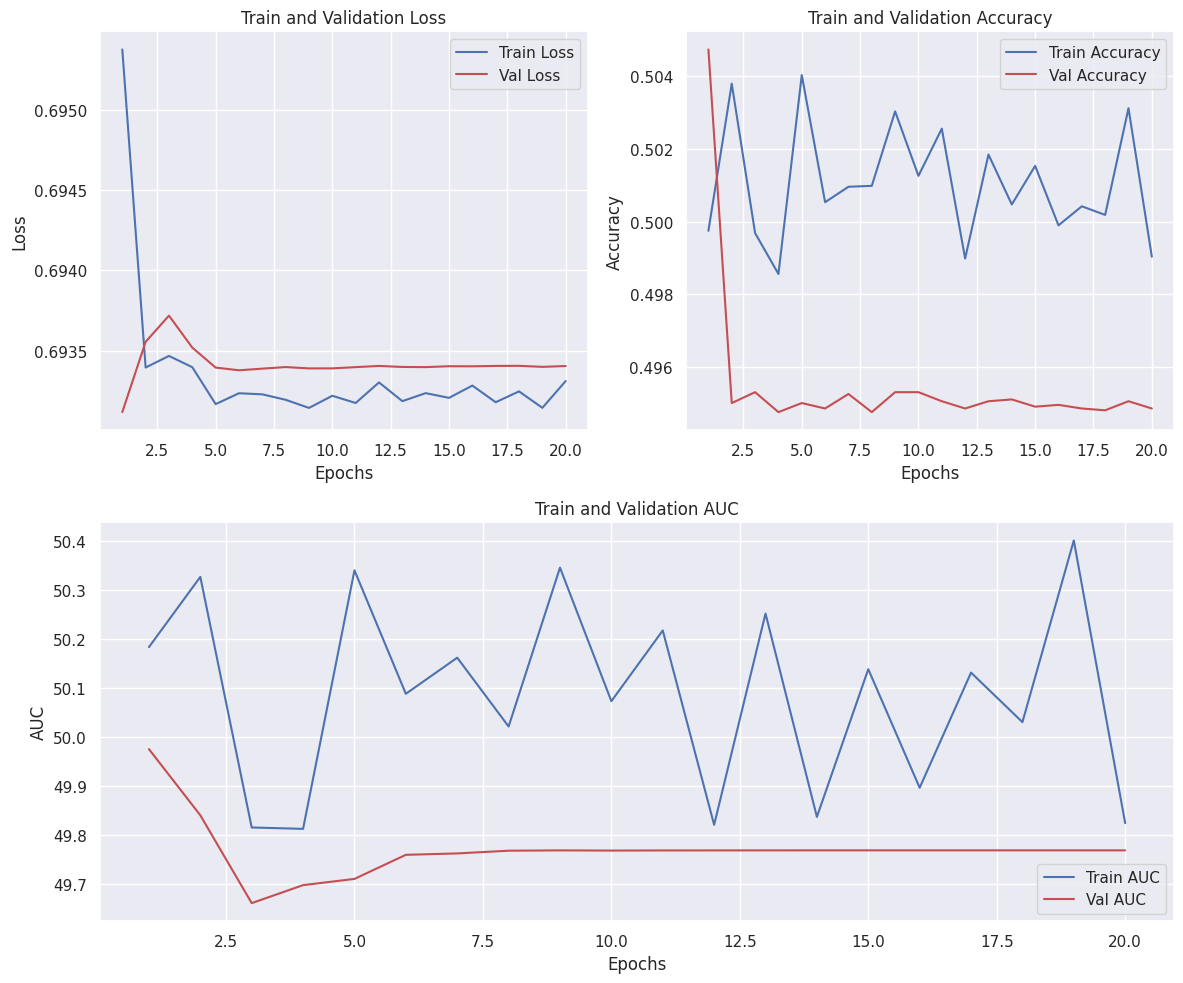

In [8]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

## Quantum with Pennylane GPU

In [9]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=10,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 47.01batch/s, Epoch = 28m 21s, Loss = 0.6951|0.6932, Acc = 0.501|0.495, AUC = 49.931|50.099


Epoch 02: 46.85batch/s, Epoch = 28m 27s, Loss = 0.6935|0.6932, Acc = 0.503|0.496, AUC = 50.215|50.043


Epoch 03: 47.10batch/s, Epoch = 28m 18s, Loss = 0.6933|0.6931, Acc = 0.501|0.505, AUC = 50.205|50.120


Epoch 04: 46.70batch/s, Epoch = 28m 32s, Loss = 0.6933|0.6931, Acc = 0.499|0.500, AUC = 49.904|50.123
TOTAL TIME = 6820.93s
BEST ACC = 0.51% AT EPOCH 3
BEST AUC = 50.12 AT EPOCH 4


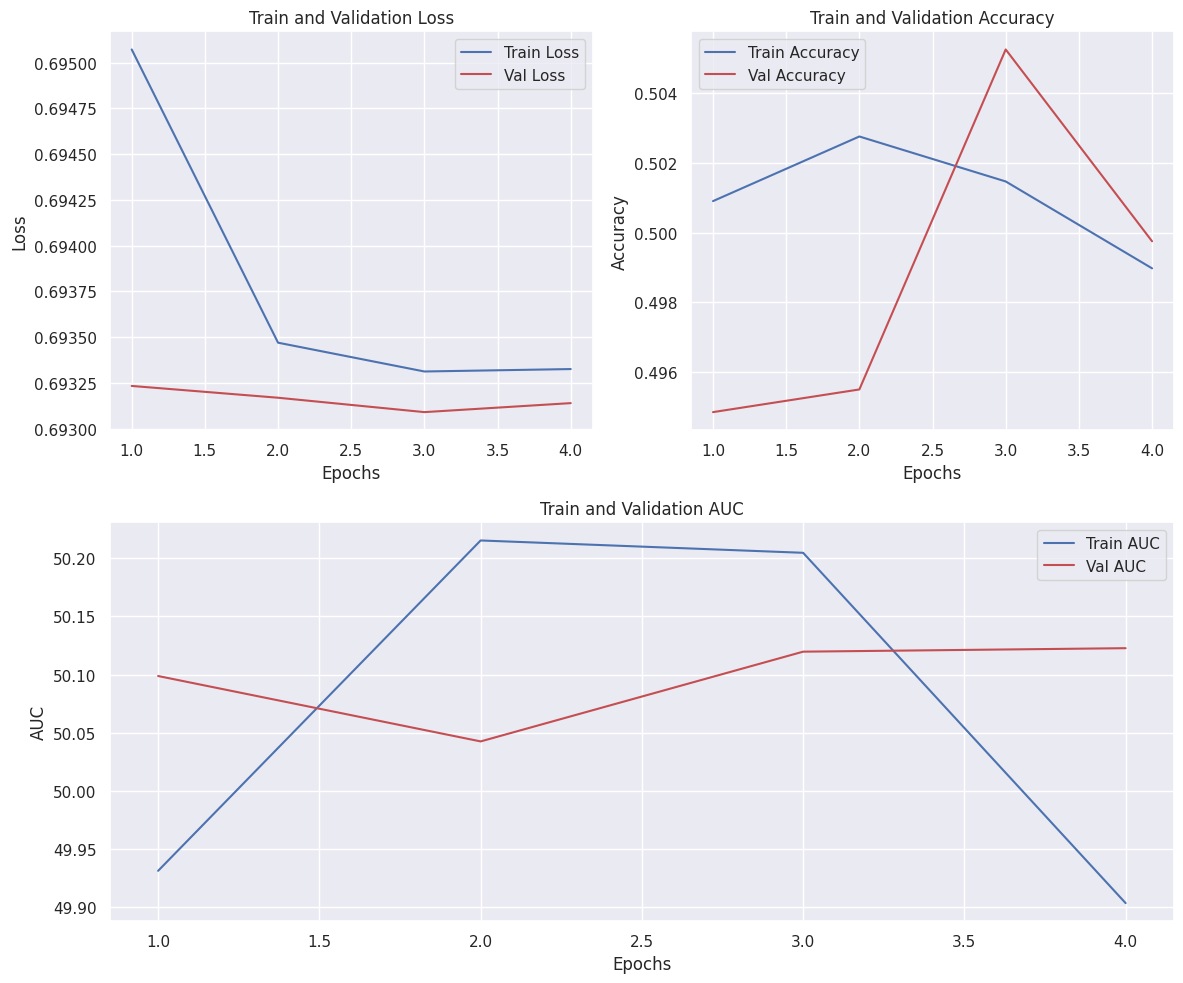

In [10]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)